<a href="https://colab.research.google.com/github/zain-ramzan/Data-Science-HISB/blob/main/Course%20Content/Week%2008%20-%20NLP/Copy_of_NLP_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<a id="agenda">Agenda</a>

1.   [Introduction to NLP](#intro)
2.   [Text Preprocessing](#Preprocessing)
  1.   [Noise Removal](#noise)
  2.   [Lexicon Normalization](#lexicon)
      1.   [Lemmatization](#lemmatization)
      2.   [Stemming](#stemming)
  3.   [Object Standardization](#standardization)
3.   [Text to Features (Feature Engineering on text data)](#Text_to_Features)
  1.   [Syntactical Parsing](#Syntactical_Parsing)
      1.   [Dependency Grammar](#Dependency_Grammar)
      2.   [Part of Speech Tagging](#Part_of_Speech_Tagging)
  2.   [Entity Parsing](#Entity_Parsing)
      1.   [Phrase Detection](#Phrase_Detection)
      2.   [Named Entity Recognition](#Named_Entity_Recognition)
      3.   [Topic Modelling](#Topic_Modelling)
      4.   [N-Grams](#N_Grams)
  3.   [Statistical features](#Statistical_features)
      1.   [TF - IDF](#TF_IDF)
      2.   [Frequency / Density Features](#Frequency_Density_Features])
      3.   [Readability Features](#Readability_Features)
  4.   [Word Embeddings](#Word_Embeddings)
4.   [Important tasks of NLP](#Important_tasks_of_NLP)
  1.   [Text Classification](#Text_Classification)
  2.   [Text Matching](#Text_Matching)
      1.   [Levenshtein Distance](#Levenshtein_Distance)
      2.   [Phonetic Matching](#Phonetic_Matching)
      3.   [Flexible String Matching](#Flexible_String_Matching)
  3.   [Coreference Resolution](#Coreference_Resolution)
  4.   [Other Problems](#Other_Problems)
5.   [Important NLP libraries](#Important_NLP_libraries)

#<a id="intro">Introduction to NLP</a>

**Tokenization** : Process of converting a text into tokens

**Tokens** : Words or entities present in the text

**Text object** : A sentence or a phrase or a word or an article



In [ ]:
# Installing libraries
! pip install -U nltk

In [ ]:
import nltk
nltk.download('punkt') # punkt, stopwords, wordnet, averaged_perceptron_tagger, maxent_ne_chunker, words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Language Models



*   Language models are statistical models that are trained on large amounts of text data to understand and generate human language.
*   They capture the probabilities and patterns of word sequences in order to predict and generate coherent and contextually appropriate text.

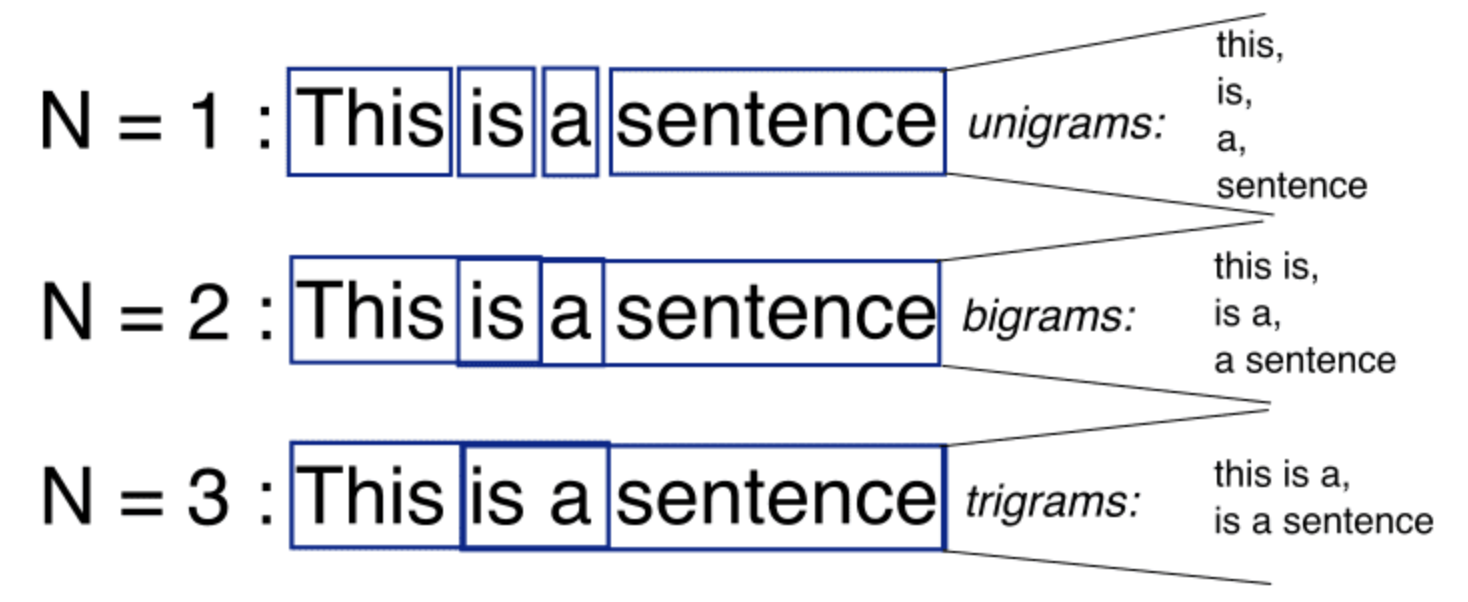

In [ ]:
from collections import defaultdict
import random

# Training data
sentences = [
    "I love cats",
    "Cats are adorable",
    "Dogs are loyal",
    "I have a dog",
    "Cats and dogs are friends",
    "I enjoy playing with cats",
    "Dogs love to fetch",
    "I prefer cats over dogs",
    "Cats make great companions",
    "Dogs are man's best friend",

]

# Function to generate n-grams from sentences
def generate_ngrams(sentences, n):
    ngrams = defaultdict(list)
    for sentence in sentences:
        words = sentence.lower().split()
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i+n-1])
            next_word = words[i+n-1]
            ngrams[ngram].append(next_word)
    return ngrams

# Generate 2-gram and 3-gram models
ngram_2 = generate_ngrams(sentences, 2)
ngram_3 = generate_ngrams(sentences, 3)

# Predict the next word based on 2-gram
seed_2 = random.choice(list(ngram_2.keys()))
next_word_2 = random.choice(ngram_2[seed_2])

# Predict the next word based on 3-gram
seed_3 = random.choice(list(ngram_3.keys()))
next_word_3 = random.choice(ngram_3[seed_3])

# Print the predictions
print("Using 2-gram model:")
print(f"Seed: '{seed_2}', Predicted Next Word: '{next_word_2}'")
print()
print("Using 3-gram model:")
print(f"Seed: '{seed_3}', Predicted Next Word: '{next_word_3}'")


Using 2-gram model:
Seed: 'and', Predicted Next Word: 'dogs'

Using 3-gram model:
Seed: 'man's best', Predicted Next Word: 'friend'


In [ ]:
ngram_2

defaultdict(list,
            {'i': ['love', 'have', 'enjoy', 'prefer'],
             'love': ['cats', 'to'],
             'cats': ['are', 'and', 'over', 'make'],
             'are': ['adorable', 'loyal', 'friends', "man's"],
             'dogs': ['are', 'are', 'love', 'are'],
             'have': ['a'],
             'a': ['dog'],
             'and': ['dogs'],
             'enjoy': ['playing'],
             'playing': ['with'],
             'with': ['cats'],
             'to': ['fetch'],
             'prefer': ['cats'],
             'over': ['dogs'],
             'make': ['great'],
             'great': ['companions'],
             "man's": ['best'],
             'best': ['friend']})

In [ ]:
ngram_3

defaultdict(list,
            {'i love': ['cats'],
             'cats are': ['adorable'],
             'dogs are': ['loyal', 'friends', "man's"],
             'i have': ['a'],
             'have a': ['dog'],
             'cats and': ['dogs'],
             'and dogs': ['are'],
             'i enjoy': ['playing'],
             'enjoy playing': ['with'],
             'playing with': ['cats'],
             'dogs love': ['to'],
             'love to': ['fetch'],
             'i prefer': ['cats'],
             'prefer cats': ['over'],
             'cats over': ['dogs'],
             'cats make': ['great'],
             'make great': ['companions'],
             "are man's": ['best'],
             "man's best": ['friend']})

In [ ]:
import nltk
from nltk.util import ngrams

# Your input sentences
sentences = [
    "I love cats",
    "Cats are adorable",
    "Dogs are loyal",
    "I have a dog",
    "Cats and dogs are friends",
    "I enjoy playing with cats",
    "Dogs love to fetch",
    "I prefer cats over dogs",
    "Cats make great companions",
    "Dogs are man's best friend",
]

# Tokenize the sentences into words
words = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create unigrams, bigrams, and trigrams
n1 = [word for sentence in words for word in sentence]
n2 = list(ngrams(n1, 2))
trigram2 = list(ngrams(n1, 3))

# Print the results
print("Unigrams (n1):")
print(n1)
print("\nBigrams (n2):")
print(n2)
print("\nTrigrams (trigram2):")
print(trigram2)


Unigrams (n1):
['I', 'love', 'cats', 'Cats', 'are', 'adorable', 'Dogs', 'are', 'loyal', 'I', 'have', 'a', 'dog', 'Cats', 'and', 'dogs', 'are', 'friends', 'I', 'enjoy', 'playing', 'with', 'cats', 'Dogs', 'love', 'to', 'fetch', 'I', 'prefer', 'cats', 'over', 'dogs', 'Cats', 'make', 'great', 'companions', 'Dogs', 'are', 'man', "'s", 'best', 'friend']

Bigrams (n2):
[('I', 'love'), ('love', 'cats'), ('cats', 'Cats'), ('Cats', 'are'), ('are', 'adorable'), ('adorable', 'Dogs'), ('Dogs', 'are'), ('are', 'loyal'), ('loyal', 'I'), ('I', 'have'), ('have', 'a'), ('a', 'dog'), ('dog', 'Cats'), ('Cats', 'and'), ('and', 'dogs'), ('dogs', 'are'), ('are', 'friends'), ('friends', 'I'), ('I', 'enjoy'), ('enjoy', 'playing'), ('playing', 'with'), ('with', 'cats'), ('cats', 'Dogs'), ('Dogs', 'love'), ('love', 'to'), ('to', 'fetch'), ('fetch', 'I'), ('I', 'prefer'), ('prefer', 'cats'), ('cats', 'over'), ('over', 'dogs'), ('dogs', 'Cats'), ('Cats', 'make'), ('make', 'great'), ('great', 'companions'), ('compa

In [ ]:
import nltk
from nltk.util import ngrams
from collections import defaultdict

# Your input sentences
sentences = [
    "I love cats",
    "Cats are adorable",
    "Dogs are loyal",
    "I have a dog",
    "Cats and dogs are friends",
    "I enjoy playing with cats",
    "Dogs love to fetch",
    "I prefer cats over dogs",
    "Cats make great companions",
    "Dogs are man's best friend",
]

# Tokenize the sentences into words
words = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create trigrams
trigrams = list(ngrams([word for sentence in words for word in sentence], 3))

# Build a trigram model for next word prediction
trigram_model = defaultdict(list)

for w1, w2, w3 in trigrams:
    trigram_model[(w1, w2)].append(w3)

# Function to predict the next word given two previous words
def predict_next_word(word1, word2):
    candidates = trigram_model.get((word1, word2), [])
    if candidates:
        return max(set(candidates), key=candidates.count)
    else:
        return None

# Example predictions
word1 = "I"
word2 = "love"
next_word = predict_next_word(word1, word2)
print(f'Next word after "{word1} {word2}": {next_word}')

word1 = "Cats"
word2 = "are"
next_word = predict_next_word(word1, word2)
print(f'Next word after "{word1} {word2}": {next_word}')


Next word after "I love": cats
Next word after "Cats are": adorable


#<a id="Preprocessing">Text Preprocessing</a>

The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.

##<a id="noise">Noise Removal</a>
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.

For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, social media entities (mentions, hashtags), punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

In [ ]:
# Sample code to remove noisy words from a text

noise_list = ["is", "a", "this", "..."]
def remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

In [ ]:
print(remove_noise("this is a sample text"))

sample text


In [ ]:
# Sample code to remove a regex pattern
import re

def remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text)
    for i in urls:
        input_text = re.sub(i.group().strip(), '', input_text)
    return input_text

regex_pattern = "#[\w]*"

In [ ]:
remove_regex("remove this #hashtag from analytics vidhya", regex_pattern)

'remove this  from analytics vidhya'

In [ ]:
# Removing noise using nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

def remove_noise(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove social media entities (mentions and hashtags)
    text = re.sub(r"@\w+|\#\w+", "", text)

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Reconstruct the text
    clean_text = " ".join(tokens)

    return clean_text

# Example usage
text = "I am excited to launch our new #product! Check it out at www.example.com #excitingtimes"
clean_text = remove_noise(text)
print(clean_text)


##<a id="lexicon">Lexicon Normalization</a>

It is a  process of standardizing and normalizing words or phrases in text. It is a key step in natural language processing (NLP) tasks and offers several benefits:

**Consistent Text Representation** : Lexicon normalization ensures that words with the same meaning are represented consistently throughout the text.

**Reduces Data Sparsity** : Normalizing words helps in reducing data sparsity by collapsing different word forms into a single form.

**Efficient Text Processing** : Lexicon normalization helps in reducing the dimensionality



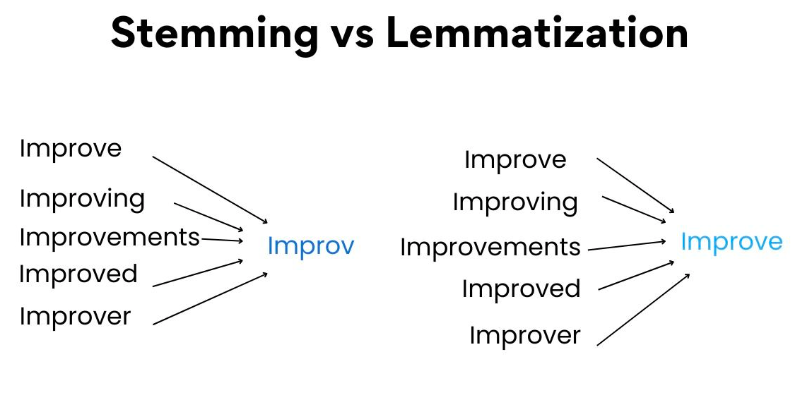

###<a id="stemming">Stemming</a>

Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [ ]:
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "multiplying"
print(stem.stem(word))

word = "improving"
print(stem.stem(word))
word = "improved"
print(stem.stem(word))


multipli
improv
improv


###<a id="lemmatization">Lemmatization</a>

Step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

Here are some common POS tags that can be used with the lemmatize() method in NLTK:

*   "n": noun
*   "v": verb
*   "a": adjective
*   "r": adverb

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

word = "multiplying"
print(lem.lemmatize(word, "v"))

word = "improving"
print(lem.lemmatize(word, "v"))
word = "improved"
print(lem.lemmatize(word, "v"))


multiply
improve
improve


##<a id="standardization">Object Standardization</a>

Text data often contains words or phrases which are not present in any standard lexical dictionaries. These pieces are not recognized by search engines and models.

In [ ]:
lookup_dict = {'rt': 'Retweet', 'dm': 'direct message', 'awsm': 'awesome', 'luv': 'love'}

def _lookup_words(input_text):
    words = input_text.split()
    new_words = []

    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word)

    new_text = " ".join(new_words)
    return new_text

_lookup_words("RT this is a retweeted tweet by Shivam Bansal")

'Retweet this is a retweeted tweet by Shivam Bansal'